<a href="https://colab.research.google.com/github/chirag300/SYDE-675/blob/main/Assignment_1_Syde_675.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment Subumission
## Chirag Seth
## cseth@uwaterloo.ca
## 21073907



#Excercise 1: Implementing MED and MMD Classifier and compairing the two

##Importing Important Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.decomposition import PCA

##Loading The Dataset

In [98]:
dataset = mnist.load_data('mnist.db')
train,test = dataset
X_train, y_train = train
X_test, y_test = test


print(len(X_train))
print(len(X_test))
print(X_train[0].shape)
temp_train = np.isin(y_train, [3, 4])
temp_test = np.isin(y_test, [3, 4])

X_train, y_train = X_train[temp_train], y_train[temp_train]
X_test, y_test = X_test[temp_test], y_test[temp_test]

60000
10000
(28, 28)


## Checking the First Image

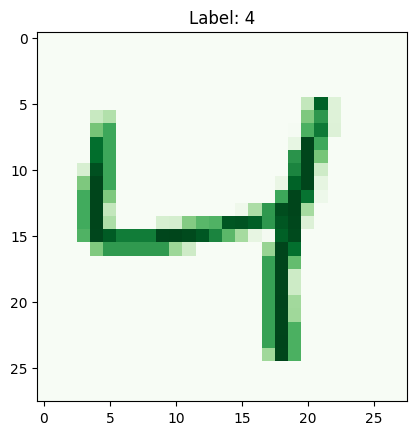

In [99]:
plt.imshow(X_train[0], cmap='Greens')
plt.title(f"Label: {y_train[0]}")
plt.show()

## Checking The Shape

In [100]:
print(X_train.shape)
print(y_train.shape)

(11973, 28, 28)
(11973,)


## Step1: Making the data Flat

In [101]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
print(X_train.shape)
print(X_test.shape)

(11973, 784)
(1992, 784)


## Step2: Converting The Data from Higher Dimension to lower Dimension

In [102]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Plotting The Graph of the Train Set with labels

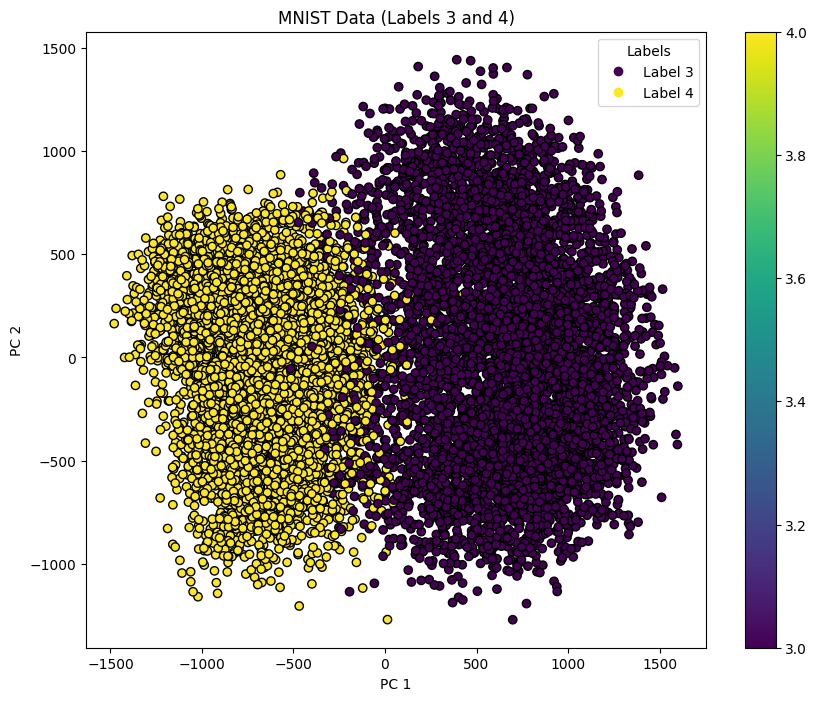

In [103]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')


legend_labels = [f"Label {label}" for label in np.unique(y_train)]
plt.legend(handles=scatter.legend_elements()[0], title="Labels", labels=legend_labels)

plt.title('MNIST Data (Labels 3 and 4)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar()
plt.show()

## Finding The Mean Values from two classes

In [104]:
mean_X_train_3 = np.mean(X_train[y_train == 3], axis=0)
mean_X_train_4 = np.mean(X_train[y_train == 4], axis=0)
print(mean_X_train_3)
print(mean_X_train_4)
mean_vectors = np.vstack([mean_X_train_3, mean_X_train_4])


[648.65008819  33.43692476]
[-680.73839279  -35.09102802]


Plotting The graph for Two classes with Class Mean

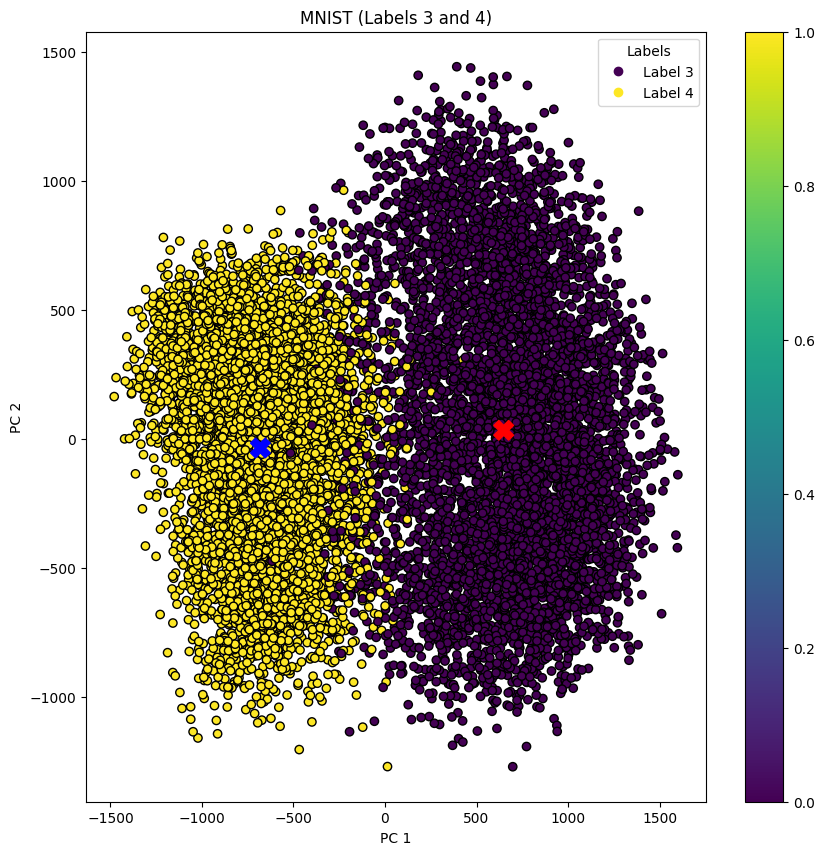

In [105]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.scatter(mean_vectors[:, 0], mean_vectors[:, 1], marker='X', s=200, c=['red', 'blue'], label=['Mean Class 3', 'Mean Class 4'])

legend_labels = [f"Label {label}" for label in np.unique(y_train)]
legend_labels.append('Mean Vectors')
plt.legend(handles=scatter.legend_elements()[0], title="Labels", labels=legend_labels)

plt.title('MNIST (Labels 3 and 4)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar()
plt.show()

## Testing The Model By Finding The Eucledian Distance between point and class Mean (For MED Classifier)



In [106]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))


In [107]:
def predict_class_1(sample):
    distance_to_class3 = euclidean_distance(sample, mean_X_train_3)
    distance_to_class4 = euclidean_distance(sample, mean_X_train_4)

    if distance_to_class3 < distance_to_class4:
        return 3
    else:
        return 4

## Calculating The Accuracy by error = Number of correct predictions/total number of data points in the test set

In [108]:
predicted_classes = [predict_class_1(sample) for sample in X_test]

correct_predictions = np.sum(predicted_classes == y_test)
total_data_points = len(y_test)
accuracy_MED = correct_predictions / total_data_points

print("Accuracy on the test set:", accuracy_MED)

Accuracy on the test set: 0.9804216867469879


In [109]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]

In [110]:
decision_boundary = np.array([predict_class_1(point) for point in meshgrid_points])

decision_boundary = decision_boundary.reshape(xx.shape)

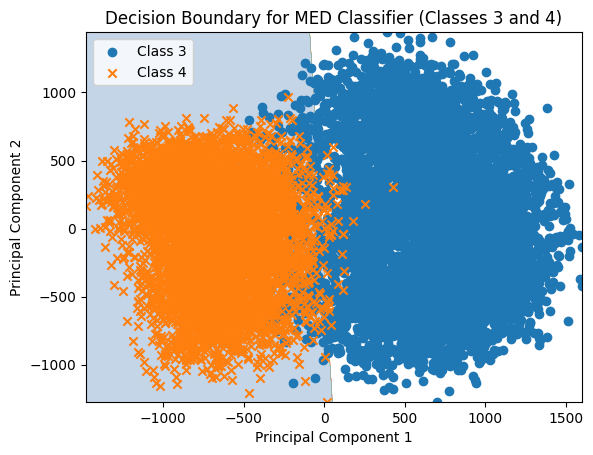

In [111]:


plt.contourf(xx, yy, decision_boundary, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X_train[y_train == 3, 0], X_train[y_train == 3, 1], label='Class 3', marker='o')
plt.scatter(X_train[y_train == 4, 0], X_train[y_train == 4, 1], label='Class 4', marker='x')
plt.title('Decision Boundary for MED Classifier (Classes 3 and 4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Accuracy on the test set: 0.9804216867469879 or 98.04%

## Visulisation For Correct Vs Wrong Predictions

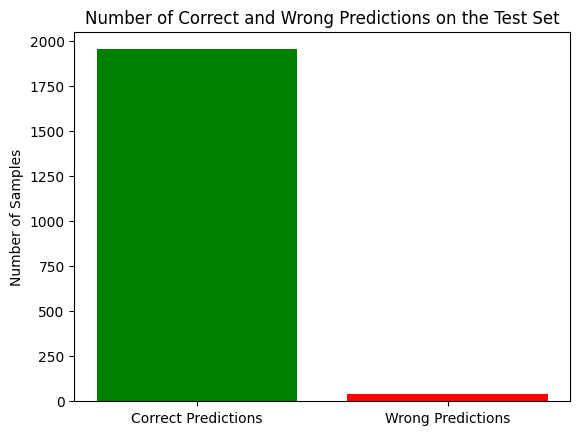

In [36]:
wrong_predictions = total_data_points - correct_predictions

labels = ['Correct Predictions', 'Wrong Predictions']
values = [correct_predictions, wrong_predictions]

plt.bar(labels, values, color=['green', 'red'])
plt.title('Number of Correct and Wrong Predictions on the Test Set')
plt.ylabel('Number of Samples')
plt.show()

## MMD Classifier

## Step1: Calculating The covaraiance Matrix

In [37]:
def cov_matrix_func(data):
    mean_vector_MMD = np.mean(data, axis=0)
    centered_data_MMD = data - mean_vector_MMD
    cov_matrix = np.dot(centered_data_MMD.T, centered_data_MMD) / (data.shape[0] - 1)
    return cov_matrix

## Step2: Function To calculate Mahalanobis Distance

In [38]:
def mahalanobis_distance_func(x, mean, cov_matrix):
    try:
        cov_inv = np.linalg.inv(cov_matrix)
        x_centered = x - mean
        distance = np.sqrt(np.dot(x_centered, np.dot(cov_inv, x_centered)))
        return distance
    except np.linalg.LinAlgError:
        raise ValueError("Covariance matrix is not invertible.")

## Step3: Calculating the class representative that is meand and covariance Matrix for each Class

In [39]:
class_3_data = X_train[y_train == 3]
class_4_data = X_train[y_train == 4]

mean_class_3 = np.mean(class_3_data, axis=0)
cov_matrix_class_3 = cov_matrix_func(class_3_data)

mean_class_4 = np.mean(class_4_data, axis=0)
cov_matrix_class_4 = cov_matrix_func(class_4_data)

## Predicting The labels using test set

In [40]:
predictions = []
for point in X_test:
    distance_class_3 = mahalanobis_distance_func(point, mean_class_3, cov_matrix_class_3)
    distance_class_4 = mahalanobis_distance_func(point, mean_class_4, cov_matrix_class_4)

    predicted_class = 3 if distance_class_3 < distance_class_4 else 4
    predictions.append(predicted_class)

In [41]:
def mmd_classifier(x):
    distance_class_3 = mahalanobis_distance_func(x, mean_class_3, cov_matrix_class_3)
    distance_class_4 = mahalanobis_distance_func(x, mean_class_4, cov_matrix_class_4)

    return 3 if distance_class_3 < distance_class_4 else 4

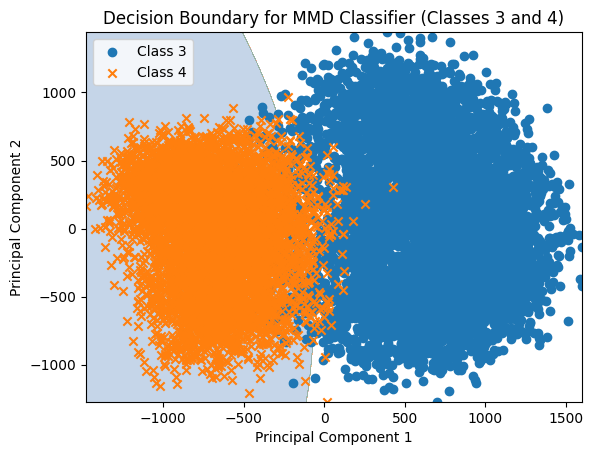

In [42]:

decision_boundary_mmd = np.array([mmd_classifier(point) for point in meshgrid_points])

decision_boundary_mmd = decision_boundary_mmd.reshape(xx.shape)

plt.contourf(xx, yy, decision_boundary_mmd, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X_train[y_train == 3, 0], X_train[y_train == 3, 1], label='Class 3', marker='o')
plt.scatter(X_train[y_train == 4, 0], X_train[y_train == 4, 1], label='Class 4', marker='x')
plt.title('Decision Boundary for MMD Classifier (Classes 3 and 4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Calculating The accuracy of MMD Classifier by testing

In [43]:

correct_predictions = np.sum(y_test == predictions)
total_points = len(y_test)
accuracy_MMD = correct_predictions / total_points
print(f"Accuracy: {accuracy_MMD}")

Accuracy: 0.981425702811245


## Difference In accuracy between MED and MMD Classifiers

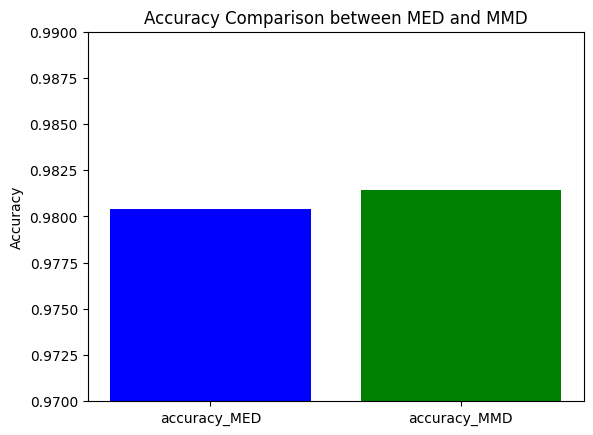

In [44]:
labels = ['accuracy_MED', 'accuracy_MMD']
accuracies = [accuracy_MED, accuracy_MMD]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.ylim(0.97,0.99 )
plt.title('Accuracy Comparison between MED and MMD')
plt.show()

## Repeating The same Steps but now For 20x1 dimensions


In [45]:
dataset = mnist.load_data('mnist.db')
train,test = dataset
X_train, y_train = train
X_test, y_test = test
print(len(X_train))
print(len(X_test))
print(X_train[0].shape)
temp_train = np.isin(y_train, [3, 4])
temp_test = np.isin(y_test, [3, 4])

X_train, y_train = X_train[temp_train], y_train[temp_train]
X_test, y_test = X_test[temp_test], y_test[temp_test]

60000
10000
(28, 28)


## Reshaping To Convert to 784x1

In [46]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
print(X_train.shape)
print(X_test.shape)

(11973, 784)
(1992, 784)


## Implementing The MED First

## Utilizing PCA to reduce the dimensions to 20x1

In [47]:
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Finding The Mean Vectors

In [48]:

mean_X_train_3 = np.mean(X_train[y_train == 3], axis=0)
mean_X_train_4 = np.mean(X_train[y_train == 4], axis=0)
print(mean_X_train_3)
print(mean_X_train_4)
mean_vectors = np.vstack([mean_X_train_3, mean_X_train_4])

[ 6.48650088e+02  3.34371352e+01  9.71916205e+00 -3.54043767e+00
  6.00668536e+00 -4.62845557e+01  3.46407770e+01  3.27625104e+01
  7.18219215e+00 -1.46441650e+01  5.06196179e-01 -1.58158204e+00
 -8.76690398e+00 -6.02284536e+00 -5.92181779e+00  3.81160551e+00
  3.98622059e+00 -1.85365624e+00  5.82299456e+00  7.45295483e-01]
[-6.80738392e+02 -3.50912488e+01 -1.01999628e+01  3.71558086e+00
 -6.30383224e+00  4.85742230e+01 -3.63544340e+01 -3.43832508e+01
 -7.53749060e+00  1.53686025e+01 -5.31237380e-01  1.65982189e+00
  9.20059711e+00  6.32079167e+00  6.21476632e+00 -4.00016320e+00
 -4.18341637e+00  1.94535543e+00 -6.11105438e+00 -7.82164773e-01]


## Finding The Eucledian Distance

In [49]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

def predict_class(sample):
    distance_to_class3 = euclidean_distance(sample, mean_X_train_3)
    distance_to_class4 = euclidean_distance(sample, mean_X_train_4)

    if distance_to_class3 < distance_to_class4:
        return 3
    else:
        return 4


## Predicting Values and Finding Accuracy

In [50]:
predicted_classes = [predict_class(sample) for sample in X_test]

correct_predictions = np.sum(predicted_classes == y_test)
total_data_points = len(y_test)
accuracy_MED_1 = correct_predictions / total_data_points

print("Accuracy on the test set:", accuracy_MED_1)

Accuracy on the test set: 0.983433734939759


## Implementing MMD Classifier for 20X1

## Finding the Mean Vectors

In [51]:
class_3_data = X_train[y_train == 3]
class_4_data = X_train[y_train == 4]

mean_class_3 = np.mean(class_3_data, axis=0)
cov_matrix_class_3 = cov_matrix_func(class_3_data)

mean_class_4 = np.mean(class_4_data, axis=0)
cov_matrix_class_4 = cov_matrix_func(class_4_data)

## Predicting The Values

In [52]:
predictions = []
for point in X_test:
    distance_class_3 = mahalanobis_distance_func(point, mean_class_3, cov_matrix_class_3)
    distance_class_4 = mahalanobis_distance_func(point, mean_class_4, cov_matrix_class_4)

    predicted_class = 3 if distance_class_3 < distance_class_4 else 4
    predictions.append(predicted_class)

## Finding The accuracy

In [53]:

correct_predictions = np.sum(y_test == predictions)
total_points = len(y_test)
accuracy_MMD_2 = correct_predictions / total_points
print(f"Accuracy: {accuracy_MMD_2}")

Accuracy: 0.9969879518072289


## Comparison Of Both Algorithms

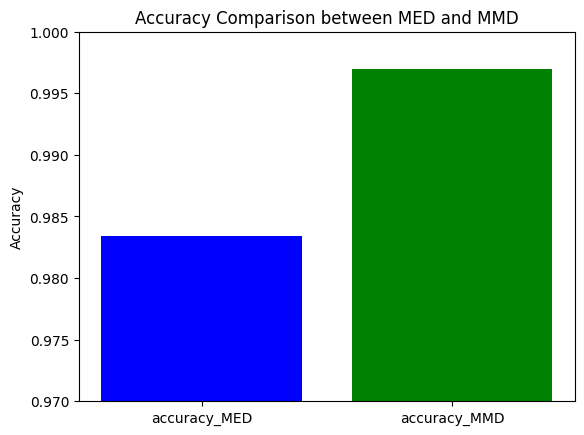

In [54]:
labels = ['accuracy_MED', 'accuracy_MMD']
accuracies = [accuracy_MED_1, accuracy_MMD_2]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.ylim(0.97,1 )
plt.title('Accuracy Comparison between MED and MMD')
plt.show()

# Excercise2 : Implementing K-Nearest Classifier and Regressor

## Importing the Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.decomposition import PCA

## Loading the Data

In [56]:
dataset = mnist.load_data('mnist.db')
train,test = dataset
X_train, Y_train = train
X_test, Y_test = test
print(len(X_train))
print(len(X_test))
print(X_train[0].shape)
temp_train = np.isin(Y_train, [3, 4])
temp_test = np.isin(Y_test, [3, 4])

X_train, Y_train = X_train[temp_train], Y_train[temp_train]
X_test, Y_test = X_test[temp_test], Y_test[temp_test]

60000
10000
(28, 28)


## Making the data flat

In [57]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
print(X_train.shape)
print(X_test.shape)

(11973, 784)
(1992, 784)


## Reducing The Dimensions to 2x1 by PCA

In [58]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Eucledian Distance Calculator

In [59]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

## Implementation of KNN

In [60]:
class KNN:
    def __init__(self, K=5):
        self.K = K

    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train

    def predict(self, X_test):
        predictions_KNN = []
        for i in range(len(X_test)):
            dist_KNN = np.sqrt(np.sum((X_test[i] - self.X_train)**2, axis=1))
            dist_sorted_KNN = np.argsort(dist_KNN)[:self.K]
            neigh_count = {}
            for j in dist_sorted_KNN:
                label = self.Y_train[j]
                neigh_count[label] = neigh_count.get(label, 0) + 1

            sorted_neigh_count = sorted(neigh_count.items(), key=lambda x: x[1], reverse=True)

            predictions_KNN.append(sorted_neigh_count[0][0])

        return predictions_KNN

## Accuracy Function

In [61]:
def calculate_accuracy_KNN(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    total_data_points = len(true_labels)
    accuracy = correct_predictions / total_data_points
    return accuracy

## Calculating The accuracy between 1- 5 values of K

In [62]:
kVals = np.arange(1, 6, 1)
accuracy_list = []
max_accuracy = 0
best_k = None

for k in kVals:
    model = KNN(K=k)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    accuracy = calculate_accuracy_KNN(predictions, Y_test)
    accuracy_list.append(accuracy)

    print(f"Accuracy for k={k}: {accuracy}")

    if accuracy > max_accuracy:
        accuracy_KNN = accuracy
        best_k = k

print(f"Highest Accuracy: {accuracy_KNN} at k={best_k}")

Accuracy for k=1: 0.9693775100401606
Accuracy for k=2: 0.9693775100401606
Accuracy for k=3: 0.9764056224899599
Accuracy for k=4: 0.9774096385542169
Accuracy for k=5: 0.9794176706827309
Highest Accuracy: 0.9794176706827309 at k=5


## Plot Showing the accuracy at different values of K

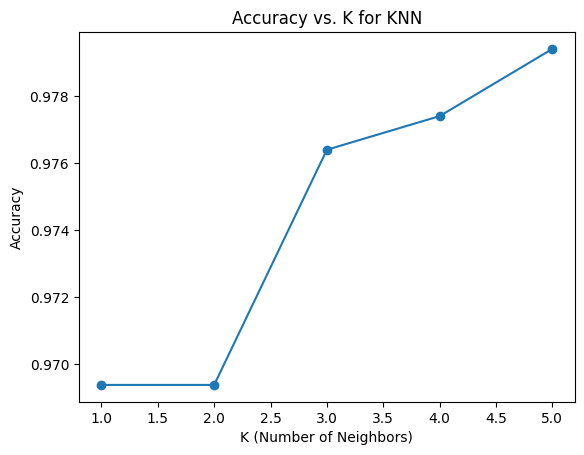

In [63]:
plt.plot(kVals, accuracy_list, marker='o')
plt.title('Accuracy vs. K for KNN')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()

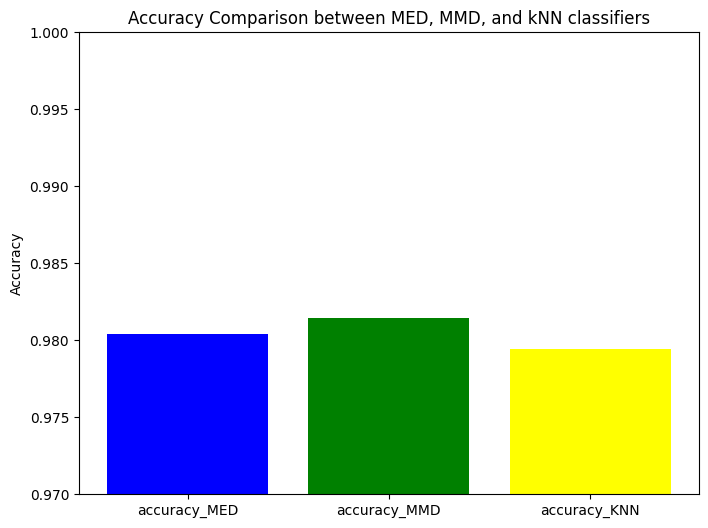

In [64]:
labels = ['accuracy_MED', 'accuracy_MMD', 'accuracy_KNN']
accuracies = [accuracy_MED, accuracy_MMD, accuracy_KNN]

plt.figure(figsize=(8, 6))

plt.bar(labels, accuracies, color=['blue', 'green', 'yellow'])
plt.ylabel('Accuracy')
plt.ylim(0.97, 1)
plt.title('Accuracy Comparison between MED, MMD, and kNN classifiers')
plt.show()

## Implementation of KNN Regressor and using it on mystery dataset

In [69]:
X_train = pd.read_csv('/content/X_train_F.csv')
y_train = pd.read_csv('/content/Y_train_F.csv')
X_test = pd.read_csv('/content/X_test_F.csv')
y_test= pd.read_csv('/content/Y_test_F.csv')

## Checking The Shape of Data

In [70]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

(99, 20)
(99, 1)
(99, 1)
(99, 20)


In [71]:
X_train

,3.369198189126900722e-01,-3.782684713181119207e-01,5.973368739787918713e-01,2.094480535624487771e-02,6.591750937098885821e-01,5.978988560741909097e-01,-5.510369612029628605e-01,-8.023607663085630115e-01,2.005503347080916932e-01,-1.529810338717647600e-01,-6.567776523782784537e-01,-5.972205909954488856e-01,-5.899714939518541090e-01,6.851739076805209994e-01,-6.432824144037356806e-01,-3.078924778817995200e-01,-3.608625127486648765e-01,9.975646552768098196e-01,9.909318813369230039e-01,-9.956526992053675862e-01
0,-0.223561,-0.533132,0.840754,-0.634503,0.463707,-0.727580,-0.162654,-0.276118,-0.500262,0.629221,0.680751,0.053947,-0.205451,-0.950159,0.395050,0.892968,0.942698,-0.338811,-0.372354,-0.979561
1,-0.059802,-0.840978,-0.243954,-0.891507,0.815429,-0.894786,-0.322314,0.196293,0.231562,0.972843,0.734390,-0.696463,0.974609,-0.559034,0.179138,-0.760083,0.626798,-0.825380,0.119909,0.722884
2,0.520117,0.681825,-0.660919,0.549877,-0.478835,-0.088332,0.086679,0.254865,-0.052149,-0.603893,0.228674,-0.627499,-0.076967,-0.726735,0.795938,-0.213907,0.305985,0.347120,0.181879,-0.731758
3,-0.020502,-0.863458,0.675717,-0.424542,-0.037360,0.192627,-0.744928,0.869214,0.623390,-0.709915,-0.008667,-0.544133,0.213813,-0.535658,0.967836,-0.748964,0.808847,-0.556181,-0.614294,-0.814282
4,0.743268,-0.665484,-0.031533,0.916119,0.982290,-0.552300,0.798253,-0.005524,0.496202,0.281364,0.885698,0.030152,-0.079914,0.827378,-0.699939,0.489902,-0.924107,0.496964,0.704550,-0.303263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-0.086401,0.141334,0.812934,-0.544201,0.488536,-0.665816,0.317181,-0.244185,0.487108,0.348716,-0.304131,0.519424,0.426266,0.701104,-0.128284,-0.677586,-0.054388,-0.585813,0.087617,0.387932
95,0.324627,0.493897,0.093027,0.053467,0.932892,0.785670,0.308335,0.384376,0.358174,0.334611,0.506454,0.335229,-0.294001,-0.011939,-0.523457,-0.754105,-0.407616,0.912155,-0.100406,-0.584064
96,-0.764720,-0.394787,0.814381,-0.848057,-0.362725,-0.257935,0.851068,0.097666,0.208097,-0.566923,-0.015934,0.827399,-0.599718,-0.336570,-0.792770,-0.945359,-0.199967,0.139048,-0.071783,0.488353
97,0.058992,0.237477,-0.749787,0.475188,0.895868,-0.923758,0.518245,0.887725,-0.408808,-0.086740,-0.209172,0.644622,0.894138,0.458732,-0.400905,-0.244209,0.466886,0.282761,0.681347,0.954976


## Converting the data in array for easy Calculation

In [72]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test= np.array(y_test)


## Function to Calculate Eucledian Distance

In [73]:
k_values = [1, 2, 3]
mse_values = []

In [74]:
def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

## Predicting The values between 1 and 3

In [75]:
for k in k_values:
    predictions = []

    for x_test in X_test:
        distances_KNN = [euclidean_distance(x_test, x_train) for x_train in X_train]
        k_indices_KNN = np.argsort(distances_KNN)[:k]
        k_nearest_neighbors = [y_train[i] for i in k_indices_KNN]
        prediction_KNN = np.mean(k_nearest_neighbors)
        predictions.append(prediction_KNN)

    mse = np.mean((y_test - predictions)**2)
    mse_values.append(mse)

## Calculating The Mean Squeare Error for Different values of K

In [76]:
for k, mse in zip(k_values, mse_values):
    print(f'MSE for k={k}: {mse}')

MSE for k=1: 10.997554389350745
MSE for k=2: 9.944360306044304
MSE for k=3: 9.061296589279936


## A plot showing the difference in Error between different Values of K

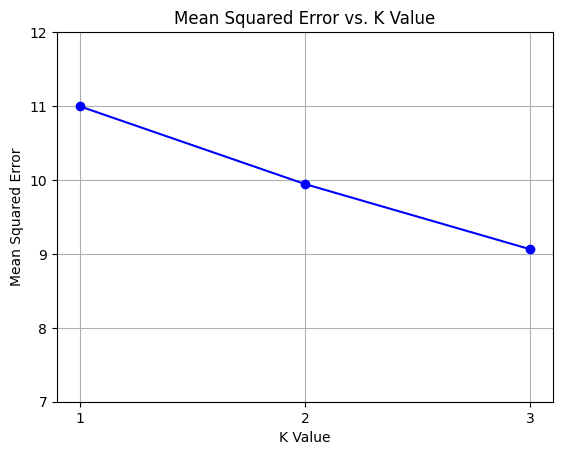

In [77]:
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b')
plt.title('Mean Squared Error vs. K Value')
plt.xlabel('K Value')
plt.ylim(7, 12)
plt.ylabel('Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Excercise 3: Implementation Of MAP and ML Classifier

## Firstly, Implementation of ML Classifier

---



## Importing Imprtant Library

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.decomposition import PCA

## Loading and filtering the data

In [79]:
dataset = mnist.load_data('mnist.db')
train,test = dataset
train_X, train_y = train
test_X, test_y = test
print(len(train_X))
print(len(test_X))
print(train_X[0].shape)
temp_train = np.isin(train_y, [3, 4])
temp_test = np.isin(test_y, [3, 4])

train_X, train_y = train_X[temp_train], train_y[temp_train]
test_X, test_y = test_X[temp_test], test_y[temp_test]

60000
10000
(28, 28)


## Making the data flat

In [80]:
train_X = train_X.reshape(-1,28*28)
test_X = test_X.reshape(-1,28*28)
print(train_X.shape)
print(test_X.shape)

(11973, 784)
(1992, 784)


## Using PCA to make the higer Dimensional data into lower Dimension

In [81]:
pca = PCA(n_components=2)
train_X = pca.fit_transform(train_X)
test_X = pca.transform(test_X)

## Calculating Mean from Classes 3 and 4

In [82]:
class_names = ['3', '4']

mu_hat = {}
for i in class_names:
    mu_hat[i] = np.mean(train_X[train_y == int(i)], axis=0)


## Calculating Covariance from classes 3 and 4

In [83]:
cov_hat = {}
for i in class_names:
    cov_hat[i] = np.cov(train_X[train_y == int(i)], rowvar=False)

## Predict Function

In [84]:
def precdet(Sigma, threshold):
    deter = np.linalg.det(Sigma)
    if deter < 1e-06:
        w, v = np.linalg.eig(Sigma)
        deter = np.product(np.real(w[w > threshold]))
        precision = np.linalg.pinv(Sigma)
    else:
        precision = np.linalg.inv(Sigma)
    return precision, deter

## Function to calculate the Determinant

In [85]:
prec_deter = {}
for i in class_names:
    prec_deter[i] = precdet(cov_hat[i], 0.5)

## Assuning the distribution to be Gaussian

In [86]:

def llGaussian(x, mu, precision, deter):
    ll = -0.5 * (np.log(deter) + np.dot(np.dot(x - mu, precision), x - mu) + (len(mu) * np.log(2 * np.pi)))
    return ll

In [87]:
def classmle(x):
    ll = np.zeros(len(class_names))
    for i in range(len(class_names)):
        ll[i] = llGaussian(x, mu_hat[class_names[i]],
                           prec_deter[class_names[i]][0],
                           prec_deter[class_names[i]][1])
    return int(class_names[np.argmax(ll)])

## Calculating The Accuracy

In [88]:
test_pred = np.apply_along_axis(classmle, 1, test_X)

accuracy_ML = np.mean(test_pred == test_y)
print("Test accuracy: ", accuracy_ML)

Test accuracy:  0.9844377510040161


## Now, the Implementation of MAP

In [89]:
class_names = ['3', '4']

prior_prob_C1 = 0.58
prior_prob_C2 = 0.42

## Calculating The Mean and Covariance

In [90]:
mu_hat = {}
cov_hat = {}
for i in class_names:
    mu_hat[i] = np.mean(train_X[train_y == int(i)], axis=0)
    cov_hat[i] = np.cov(train_X[train_y == int(i)], rowvar=False)

## Predictor Function

In [91]:
def multivariate_normal_pdf(x, mean, cov):
    d = len(mean)
    det = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)

    exp_term = -0.5 * np.dot(np.dot((x - mean).T, inv_cov), x - mean)
    coeff = 1 / ((2 * np.pi) ** (d / 2) * np.sqrt(det))

    return coeff * np.exp(exp_term)

In [92]:
def map_classifier(x):
    likelihood_C1 = multivariate_normal_pdf(x, mean=mu_hat['3'], cov=cov_hat['3'])
    likelihood_C2 = multivariate_normal_pdf(x, mean=mu_hat['4'], cov=cov_hat['4'])

    posterior_C1 = prior_prob_C1 * likelihood_C1
    posterior_C2 = prior_prob_C2 * likelihood_C2

    return '3' if posterior_C1 > posterior_C2 else '4'


## Calculating The Accuracy

In [93]:
test_pred_map = np.array([map_classifier(x) for x in test_X])
test_pred_map_uint8 = test_pred_map.astype('uint8')

accuracy_MAP = np.mean(test_pred_map_uint8 == test_y)
print("MAP Classifier Test Accuracy:", accuracy_MAP)

MAP Classifier Test Accuracy: 0.9819277108433735


# Comparison Of All algorithms based on their accuracies

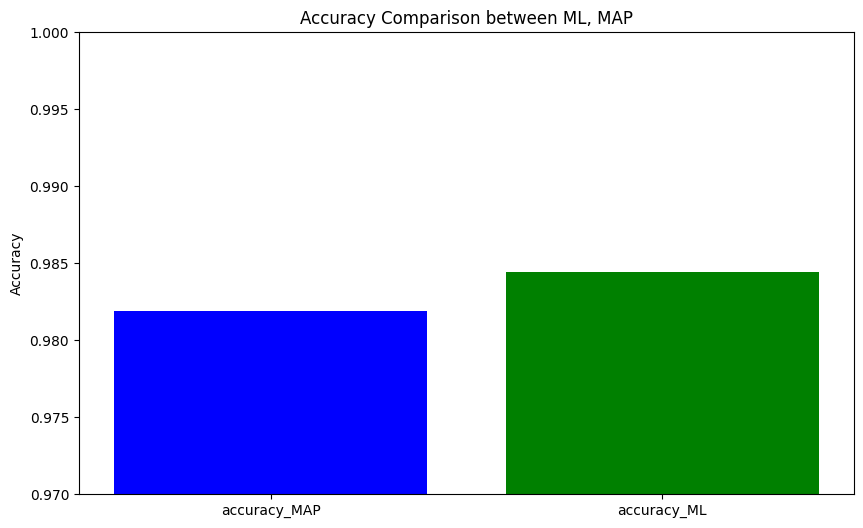

In [94]:
labels = ['accuracy_MAP', 'accuracy_ML']
accuracies = [ accuracy_MAP, accuracy_ML]

plt.figure(figsize=(10, 6))

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.ylim(0.97, 1)
plt.title('Accuracy Comparison between ML, MAP')
plt.show()

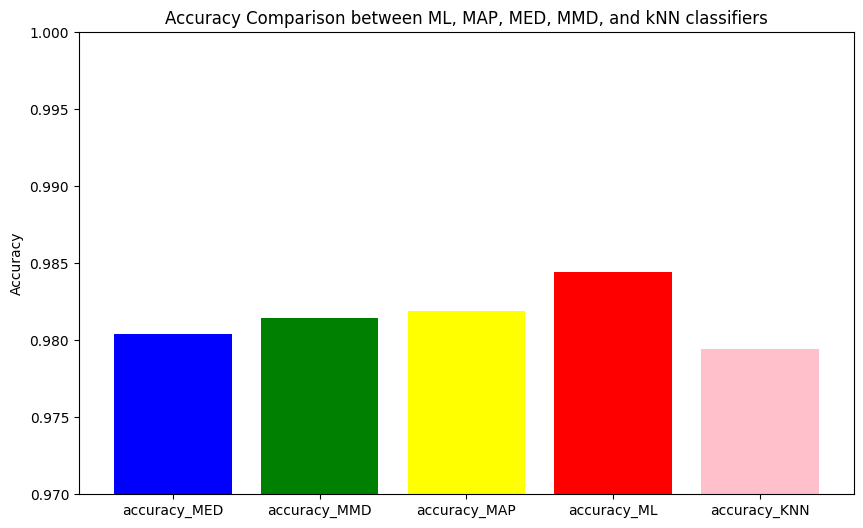

In [95]:
labels = ['accuracy_MED', 'accuracy_MMD', 'accuracy_MAP', 'accuracy_ML', 'accuracy_KNN']
accuracies = [accuracy_MED, accuracy_MMD, accuracy_MAP, accuracy_ML, accuracy_KNN]

plt.figure(figsize=(10, 6))

plt.bar(labels, accuracies, color=['blue', 'green', 'yellow', 'red', 'pink'])
plt.ylabel('Accuracy')
plt.ylim(0.97, 1)
plt.title('Accuracy Comparison between ML, MAP, MED, MMD, and kNN classifiers')
plt.show()